In [1]:
from osgeo import gdal

print("GDAL's version is :" +gdal.__version__)
print(gdal)

GDAL's version is :2.2.3
<module 'osgeo.gdal' from '/usr/local/lib/python3.7/dist-packages/osgeo/gdal.py'>


In [2]:
dataset = gdal.Open('/content/drive/MyDrive/NESAC/SupervisedClassification-Tutorial-master/SupervisedClassification-Tutorial-master/example/LE70220491999322EDC01_stack.gtif')

print(dataset)

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x7fb138191930> >


In [3]:
# Here we will utilize GDAL merge method to stack the layers. In this case the gdal is utilised for managing python libraries

In [4]:
xSize=dataset.RasterXSize
print(xSize)
projection=dataset.GetProjection()
print(projection)

250
PROJCS["WGS 84 / UTM zone 15N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-93],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32615"]]


In [5]:
blue=dataset.GetRasterBand(1)
print(blue)

<osgeo.gdal.Band; proxy of <Swig Object of type 'GDALRasterBandShadow *' at 0x7fb133cf0f30> >


In [6]:
band_min,band_max,band_mean,band_stddev = blue.GetStatistics(0,1)
print('band max:'+str(band_max))
print('band min:'+str(band_min))
print('band mean:'+str(band_mean))
print('band SD:'+str(band_stddev))

band max:1810.0
band min:198.0
band mean:439.015984
band SD:139.7168287663


In [9]:
band_max, band_min, band_Mean, band_stddev = blue.GetStatistics(0,1)
print('Band range: {minimum}-{maximum}'.format(maximum=band_max,minimum=band_min))
print('Band mean, stddev: {m}, {s}\n'. format(m=band_mean, s=band_stddev))

Band range: 1810.0-198.0
Band mean, stddev: 439.015984, 139.7168287663



In [11]:
import numpy as np

In [12]:
data = dataset.ReadAsArray()
print(data.shape)

(8, 250, 250)


In [13]:
#initializing a 3d array

image = np.zeros((250,250,8))

#looping over all the bands

for b in range(dataset.RasterCount):
  band = dataset.GetRasterBand(b + 1)

  #Read in the bands data into the third dimension of our array
  image[:,:,b] = band.ReadAsArray()

print(image.shape)
print(image.dtype)



(250, 250, 8)
float64


#Calulate **NDVI** =

In [15]:
ndvi = (image[:,:,2] - image[:,:,3]) / (image[:,:,2] + image[:,:,3])

print(ndvi)
print('\nMax NDVI: {m}'.format(m=ndvi.max()))
print('\nMean NDVI: {m}'.format(m=ndvi.mean()))
print('\nMedian NDVI: {m}'.format(m=np.median(ndvi)))
print('\nMin NDVI: {m}'.format(m=ndvi.min()))

[[-0.71390828 -0.71079741 -0.69352291 ... -0.79392185 -0.81408451
  -0.79165379]
 [-0.68064263 -0.6787194  -0.6643924  ... -0.81387182 -0.79880597
  -0.77389811]
 [-0.66904762 -0.67268446 -0.66332892 ... -0.78495923 -0.78278801
  -0.81253291]
 ...
 [-0.68301262 -0.68593651 -0.67145614 ... -0.81065089 -0.78050922
  -0.76519266]
 [-0.67341718 -0.6622986  -0.65331611 ... -0.80436681 -0.77483099
  -0.75      ]
 [-0.63973799 -0.62396514 -0.66731813 ... -0.7094648  -0.70005244
  -0.74574523]]

Max NDVI: -0.09470304975922954

Mean NDVI: -0.7088133953809207

Median NDVI: -0.7319195214790647

Min NDVI: -0.9046013008913515


In [16]:
 print('Array shape before: {shp} (size is {sz})'.format(shp=image[:,:,3].shape, sz=image[:,:,3].size))

 red=np.ndarray.flatten(image[:,:,2])
 nir=np.ndarray.flatten(image[:,:,3])

 print(nir.shape)

Array shape before: (250, 250) (size is 62500)
(62500,)


In [17]:
import matplotlib.pyplot as plt


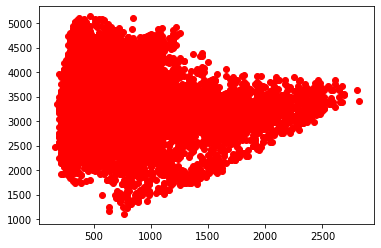

In [18]:
plt.scatter(red,nir,color='r',marker='o')
plt.show()

0.09470304975922954


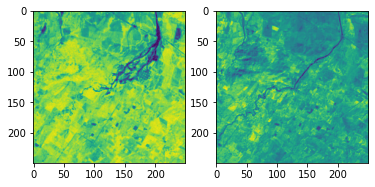

In [19]:
red_ndvi=image[:,:,2]
nir_ndvi=image[:,:,3]
ndvi = (nir_ndvi-red_ndvi)/(nir_ndvi+red_ndvi)
print(ndvi.min())
plt.subplot(121)
plt.imshow(ndvi)
plt.subplot(122)
plt.imshow(image[:,:,3])


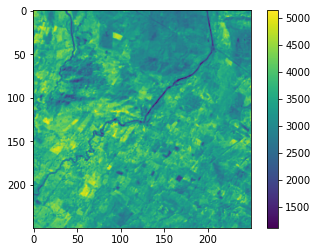

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

# Extract reference to SWIR1, NIR, and Red bands
colors = image[:, :, 3].astype(np.float64)


plt.imshow(colors)
plt.colorbar()

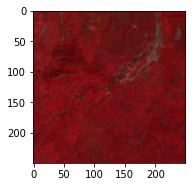

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

# Extract reference to SWIR1, NIR, and Red bands
index = np.array([3, 2, 1])
colors = image[:, :, index].astype(np.float64)

max_val = 8000
min_val = 0

# Enforce maximum and minimum values
colors[colors[:, :, :] > max_val] = max_val
colors[colors[:, :, :] < min_val] = min_val

for b in range(colors.shape[2]):
    colors[:, :, b] = colors[:, :, b] * 1 / (max_val - min_val)

plt.subplot(121)
plt.imshow(colors)